Create map with the regional domains

In [29]:
import numpy as np
import emodnetchemistry
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
from matplotlib.patches import Polygon
coast = cfeature.GSHHSFeature(scale="i")
from importlib import reload

In [30]:
globalproj = ccrs.Orthographic(central_longitude=5.0, central_latitude=50.0, globe=None)
datacrs = ccrs.PlateCarree()

In [31]:
arctic = emodnetchemistry.Region(-44.25, 70.0, 56.5, 83.0, 0.25, 0.125, "Arctic region")
atlantic = emodnetchemistry.Region(-42.0, -0.1, 24.9, 48.0, 0.1, 0.1, "North-East Atlantic Ocean")
balticsea = emodnetchemistry.Region(9.4, 30.9, 53.0, 65.9, 0.1, 0.1, "Baltic Sea")
blacksea = emodnetchemistry.Region(26.5, 41.95, 40.0, 47.95, 0.05, 0.05, "Black Sea")
mediterranean = emodnetchemistry.Region(-7.0, 36.375, 30.0, 45.875, 0.125, 0.125, "Mediterranean Sea")
northsea = emodnetchemistry.Region(-5.4, 13.0, 47.9, 62.0, 0.1, 0.1, "North Sea")
regionlist = [arctic, atlantic, balticsea, blacksea, mediterranean, northsea]

In [32]:
dlon = .1
dlat = .1
regiondict = {"Arctic": [[-70., 70., 56.5, 83.]],
    "Baltic": [[9.4, 30.9, 53., 60.], [14. , 30.9, 60., 65.9]],
    "North Sea": [[-5.4, 13., 47.9, 62.]],
    "Mediterranean Sea": [[-0.8, 36.375, 30., 46.375], [-7,36.375, 30. ,43.]],
    "Black Sea":[[26.5, 41.95, 40., 47.95]]
             }

In [33]:
globalproj

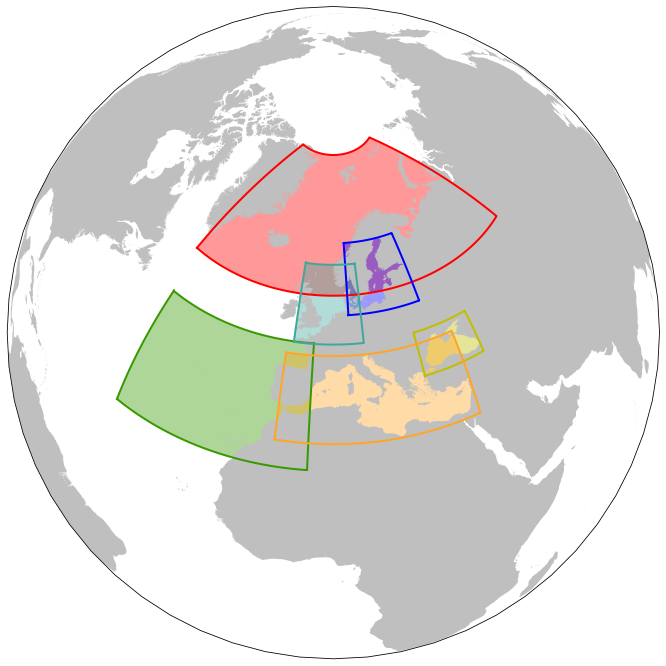

In [41]:
reload(emodnetchemistry)
colorlist = ["r", "b", "g", "y", "k", "c"]
colorlist = ["r", "#389900", "b", "y", "#FFA527", "#3FA89C"]

i = 0

plt.figure(figsize=(12, 12))
ax = plt.subplot(111, projection=globalproj)
for region, col in zip(regionlist, colorlist):
    region.get_rect_coords()
    region.get_rect_patch(globalproj, facecolor=col, alpha=0.4)

    ax.plot(region.lonvector, region.latvector, color=col, 
            transform=datacrs, label=region.name, linewidth=2)
    ax.add_patch(region.rect)
    
xx = np.arange(-180, 180, 30)
yy = np.arange(-90, 90, 30.)
xxx, yyy = np.meshgrid(xx, yy)
ax.plot(xxx.flatten(), yyy.flatten(), "wo", ms=.001, transform=datacrs, zorder=1)
    
ax.add_feature(coast, facecolor=".75", edgecolor=None)
    
plt.show()